# Imports

In [1]:
import csv
import json
import numpy as np
import matplotlib.pyplot as plt

# Toxicity scores per State

In [2]:
#toxicities = '{"AC": [0.5, 0.4], "AL": [0.5, 0.48], "AM": [0.265, 0.4654], "AP": [0.5, 0.455], "BA": [0.5546, 0.4], "CE": [0.5, 0.466], "DF": [0.65445415, 0.4], "ES": [0.76485, 0.4644], "GO": [0.115, 0.114], "MA": [0.885, 0.4], "MG": [0.5, 0.4], "MS": [0.588, 0.4], "MT": [0.5, 0.4], "PA": [0.5, 0.4], "PB": [0.5, 0.4], "PE": [0.5, 0.4], "PI": [0.5, 0.4], "PR": [0.5, 0.4], "RJ": [0.5, 0.4], "RN": [0.5, 0.4], "RO": [0.5, 0.4], "RR": [0.5, 0.4], "RS": [0.5, 0.4], "SC": [0.5, 0.4], "SE": [0.5, 0.4], "SP": [0.5, 0.4], "TO": [0.5, 0.4]}'
import json

with open('dataAug.json', 'r') as f:
    toxicitiesAug = json.load(f)

with open('dataSep.json', 'r') as f:
    toxicitiesSep = json.load(f)

with open('dataOct.json', 'r') as f:
    toxicitiesOct = json.load(f)

for key in toxicitiesAug.keys():
    for listElement in toxicitiesSep.get(key) + toxicitiesOct.get(key):
        toxicitiesAug.get(key).append(listElement)
        

toxicities_dict = toxicitiesAug

count = 0
for key in toxicities_dict:
    x = len(toxicities_dict[key])
    print(key + ": " + str(x))
    count += x

print()
print("total amount of tweets after geo filter: " + str(count))
print()
print(toxicities_dict)

AC: 24
AL: 320
AP: 53
AM: 149
BA: 514
CE: 461
DF: 505
ES: 144
GO: 264
MA: 166
MT: 63
MS: 28
MG: 1114
PA: 87
PB: 216
PR: 483
PE: 572
PI: 58
RJ: 1702
RN: 158
RS: 621
RO: 10
RR: 0
SC: 449
SP: 2133
SE: 63
TO: 36

total amount of tweets after geo filter: 10393

{'AC': [0.038852096, 0.800372, 0.6925407, 0.08244847, 0.14269894, 0.5, 0.038852096, 0.049831573, 0.0060317097, 0.20303296, 0.0060002944, 0.055521555, 0.10332008, 0.032778896, 0.09351514, 0.020166516, 0.099415205, 0.038852096, 0.8674699, 0.28004074, 0.07503674, 0.038852096, 0.04341242, 0.57963264], 'AL': [0.099415205, 0.08244847, 0.6152542, 0.038852096, 0.099415205, 0.08244847, 0.6152542, 0.038852096, 0.2840909, 0.22218697, 0.082289286, 0.4028394, 0.012811388, 0.055042017, 0.14081477, 0.4042038, 0.11025501, 0.4028394, 0.08244847, 0.67148936, 0.68248624, -1, 0.86052006, 0.08599611, 0.06294814, 0.12148245, 0.07880049, 0.4028394, 0.099415205, 0.099415205, 0.14704703, 0.07980806, 0.13025789, 0.07958577, 0.33493865, 0.16477858, 0.0430974, 

In [3]:
for state in toxicities_dict:
    print(toxicities_dict[state]) 

[0.038852096, 0.800372, 0.6925407, 0.08244847, 0.14269894, 0.5, 0.038852096, 0.049831573, 0.0060317097, 0.20303296, 0.0060002944, 0.055521555, 0.10332008, 0.032778896, 0.09351514, 0.020166516, 0.099415205, 0.038852096, 0.8674699, 0.28004074, 0.07503674, 0.038852096, 0.04341242, 0.57963264]
[0.099415205, 0.08244847, 0.6152542, 0.038852096, 0.099415205, 0.08244847, 0.6152542, 0.038852096, 0.2840909, 0.22218697, 0.082289286, 0.4028394, 0.012811388, 0.055042017, 0.14081477, 0.4042038, 0.11025501, 0.4028394, 0.08244847, 0.67148936, 0.68248624, -1, 0.86052006, 0.08599611, 0.06294814, 0.12148245, 0.07880049, 0.4028394, 0.099415205, 0.099415205, 0.14704703, 0.07980806, 0.13025789, 0.07958577, 0.33493865, 0.16477858, 0.0430974, 0.8509514, 0.8265334, 0.07870323, 0.19174924, 0.2840909, 0.22479993, 0.018146463, 0.8223625, 0.800372, 0.8223625, 0.099415205, 0.71887034, 0.85686743, -1, -1, 0.0472944, 0.4028394, 0.54238683, 0.18801403, 0.67645067, 0.4383876, -1, 0.55739564, -1, 0.67148936, 0.85178024,

In [4]:
toxicities_average = {}
amountOfTweets = {}

x = 0
for state in toxicities_dict:
    toxicities_dict[state] = list(filter(lambda s: s>=0, toxicities_dict[state]))
    x+= len(toxicities_dict[state])

print("before language filter: " + str(count))
print("after language filter: " + str(x))
print("lost due to language: " + str(count - x) + " | " + str((count-x)*100/count) + "%")

for state in toxicities_dict:
    if (len(toxicities_dict[state]) == 0):
        toxicities_average[state] = -1
        continue
    amountOfTweets[state] = len(toxicities_dict[state])
    toxicities_average[state] = sum(toxicities_dict[state]) / len(toxicities_dict[state])

before language filter: 10393
after language filter: 9835
lost due to language: 558 | 5.3689983642836525%


In [5]:
print(toxicities_average)

{'AC': 0.2036947859625, 'AL': 0.2730054646868856, 'AP': 0.2856032844893617, 'AM': 0.23113440235616445, 'BA': 0.301470981511202, 'CE': 0.25248730564533023, 'DF': 0.28990764341770675, 'ES': 0.24945500552624109, 'GO': 0.2111851406436781, 'MA': 0.24207726332484067, 'MT': 0.2340880373225806, 'MS': 0.37350540079999994, 'MG': 0.4093449775417491, 'PA': 0.2772328148815791, 'PB': 0.2737347439318625, 'PR': 0.2662638021030704, 'PE': 0.3265774662062386, 'PI': 0.28590577352631585, 'RJ': 0.2475167542080354, 'RN': 0.3015383704735485, 'RS': 0.27786310228754424, 'RO': 0.21288458688888887, 'RR': -1, 'SC': 0.3975229742552517, 'SP': 0.25648317459108255, 'SE': 0.27249580011587293, 'TO': 0.4733229538000001}


# Abstention data per state

In [6]:
data = csv.reader(open('data_elections/quantitativo_comp_abst-uf_2022_1.csv', newline=''), delimiter=',', quotechar='|')
dataarr = []
datadict = {}
skip = True
for row in data:
    if skip:
        skip = False
        continue
    datadict[row[3]] = float(row[8])
    dataarr.append([row[3], float(row[8]), int(row[6])])
    #State, Percentage abstention, Quantity abstention
del datadict["ZZ"]
print(datadict)

{'AC': 0.224197147, 'AL': 0.223740742, 'AM': 0.201183043, 'AP': 0.19502367, 'BA': 0.213323741, 'CE': 0.174492312, 'DF': 0.175668223, 'ES': 0.207576503, 'GO': 0.217173741, 'MA': 0.2219005, 'MG': 0.222752376, 'MS': 0.22077375, 'MT': 0.233762747, 'PA': 0.212122134, 'PB': 0.172911591, 'PE': 0.182002873, 'PI': 0.176788108, 'PR': 0.194846355, 'RJ': 0.227417766, 'RN': 0.18153838, 'RO': 0.24638603, 'RR': 0.16704893, 'RS': 0.197787645, 'SC': 0.184503479, 'SE': 0.18344169, 'SP': 0.216184341, 'TO': 0.185369693}


In [7]:
final_dict = {}

datadict_sorted = dict(sorted(datadict.items(), key=lambda x:x[1]))

for state in datadict_sorted:
    final_dict[state] = [toxicities_average[state], datadict_sorted[state]]

print(final_dict)

{'RR': [-1, 0.16704893], 'PB': [0.2737347439318625, 0.172911591], 'CE': [0.25248730564533023, 0.174492312], 'DF': [0.28990764341770675, 0.175668223], 'PI': [0.28590577352631585, 0.176788108], 'RN': [0.3015383704735485, 0.18153838], 'PE': [0.3265774662062386, 0.182002873], 'SE': [0.27249580011587293, 0.18344169], 'SC': [0.3975229742552517, 0.184503479], 'TO': [0.4733229538000001, 0.185369693], 'PR': [0.2662638021030704, 0.194846355], 'AP': [0.2856032844893617, 0.19502367], 'RS': [0.27786310228754424, 0.197787645], 'AM': [0.23113440235616445, 0.201183043], 'ES': [0.24945500552624109, 0.207576503], 'PA': [0.2772328148815791, 0.212122134], 'BA': [0.301470981511202, 0.213323741], 'SP': [0.25648317459108255, 0.216184341], 'GO': [0.2111851406436781, 0.217173741], 'MS': [0.37350540079999994, 0.22077375], 'MA': [0.24207726332484067, 0.2219005], 'MG': [0.4093449775417491, 0.222752376], 'AL': [0.2730054646868856, 0.223740742], 'AC': [0.2036947859625, 0.224197147], 'RJ': [0.2475167542080354, 0.227

In [8]:
var1 = []
var2 = []
var3 = []

for state in final_dict:
    if (final_dict[state][0] == -1):
        continue
    var1.append(final_dict[state][0])
    var2.append(final_dict[state][1])
    var3.append(state + ": " + str(amountOfTweets[state]))

# Calculation of correlation

var1 = []
var2 = []
var3 = []

for state in toxicities_average:
    if (toxicities_average[state] == -1):
        continue
    var1.append(toxicities_average[state])
    
for state in datadict:
    if (toxicities_average[state] == -1):
        continue
    var2.append(datadict[state])

for state in datadict:
    if (toxicities_average[state] == -1):
        continue
    var3.append(state)

#calculate the correlation between the two arrays
np.corrcoef(var1, var2)[0,1]

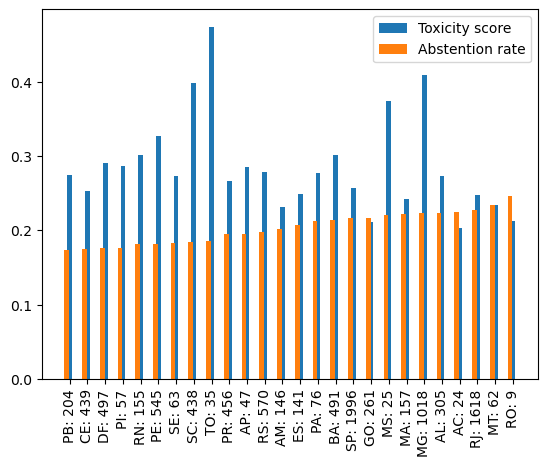

In [9]:
states = var3
tox = var1
abs = var2
xposT = []
xposA = []

for i in range(len(states)):
    xposT.append(3*i+1)
    xposA.append(3*i+0.5)

plt.bar(xposT, tox, label='Toxicity score')
plt.bar(xposA, abs, label='Abstention rate')
plt.xticks(xposT, states, rotation=90)
plt.legend()

plt.show()